In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

## 0. Getting the stock data from yahoo.

Notebook adapted from: https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm

In [12]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [14]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-02-22,3232.320068,3172.260010,3208.129883,3180.739990,3515700.0,3180.739990,AMAZON
2021-02-23,3204.729980,3093.600098,3127.030029,3194.500000,4677200.0,3194.500000,AMAZON
2021-02-24,3171.229980,3125.379883,3166.750000,3159.530029,3011300.0,3159.530029,AMAZON
2021-02-25,3178.260010,3047.760010,3136.739990,3057.159912,4533800.0,3057.159912,AMAZON
2021-02-26,3122.439941,3036.699951,3095.199951,3092.929932,4273500.0,3092.929932,AMAZON
2021-03-01,3149.560059,3097.989990,3127.889893,3146.139893,2729100.0,3146.139893,AMAZON
2021-03-02,3163.520020,3087.120117,3143.469971,3094.530029,2590000.0,3094.530029,AMAZON
2021-03-03,3107.780029,2995.000000,3081.179932,3005.000000,3967200.0,3005.000000,AMAZON
2021-03-04,3058.129883,2945.429932,3012.000000,2977.570068,5458700.0,2977.570068,AMAZON


In [15]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,106.197062,103.137012,104.729701,104.708486,1.488253e+08,104.366698
std,23.912811,23.406438,23.859375,23.644104,6.661079e+07,23.760229
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.661041
25%,83.168751,81.318752,81.863750,83.119999,1.023520e+08,82.703918
50%,115.430000,112.220001,113.949997,113.489998,1.335608e+08,113.125496
75%,125.180000,121.359997,123.755001,123.160000,1.765794e+08,122.976234
max,145.089996,141.369995,143.600006,143.160004,4.184740e+08,142.946396


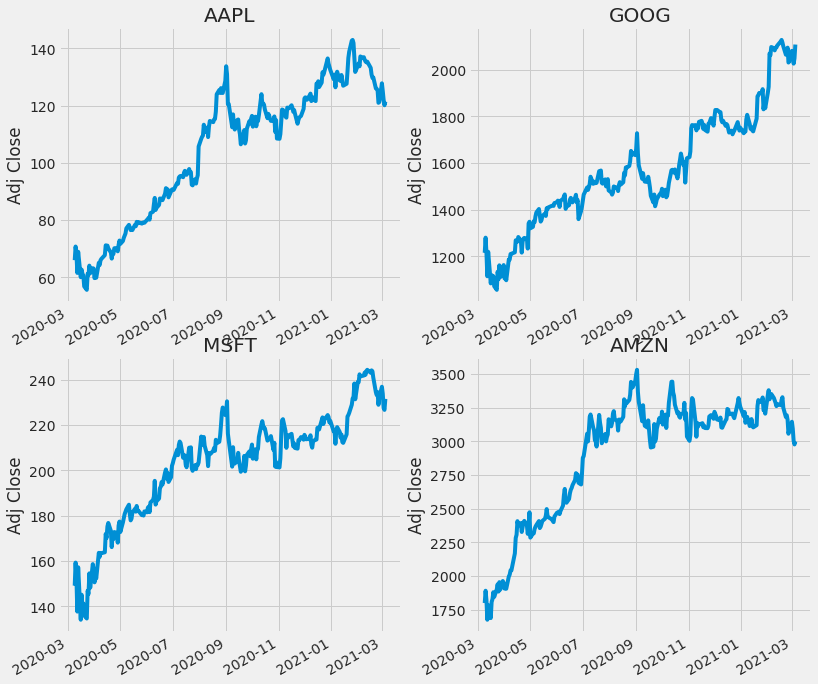

In [16]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## 1. Moving Average

In [17]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

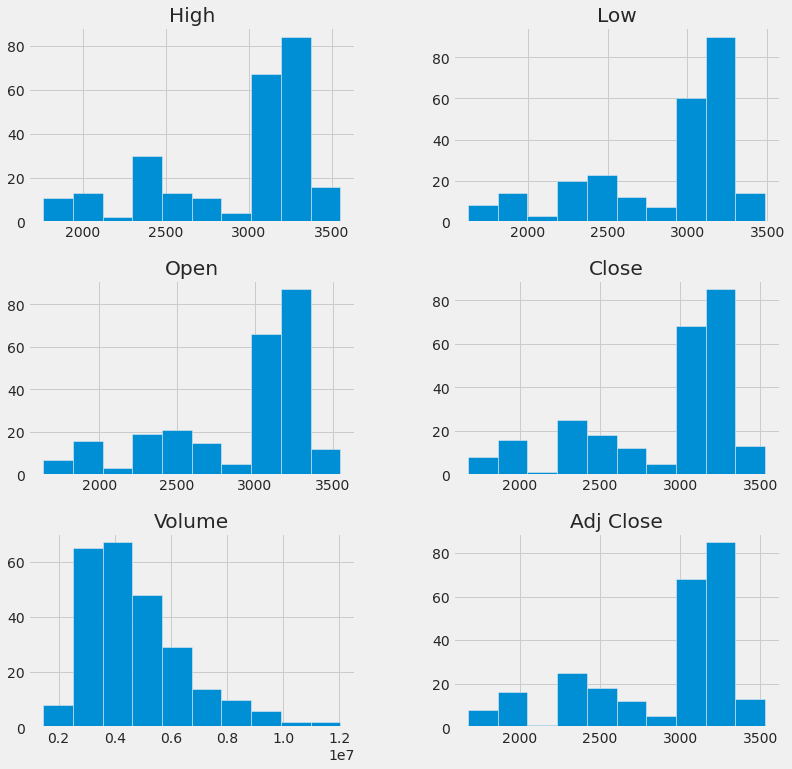

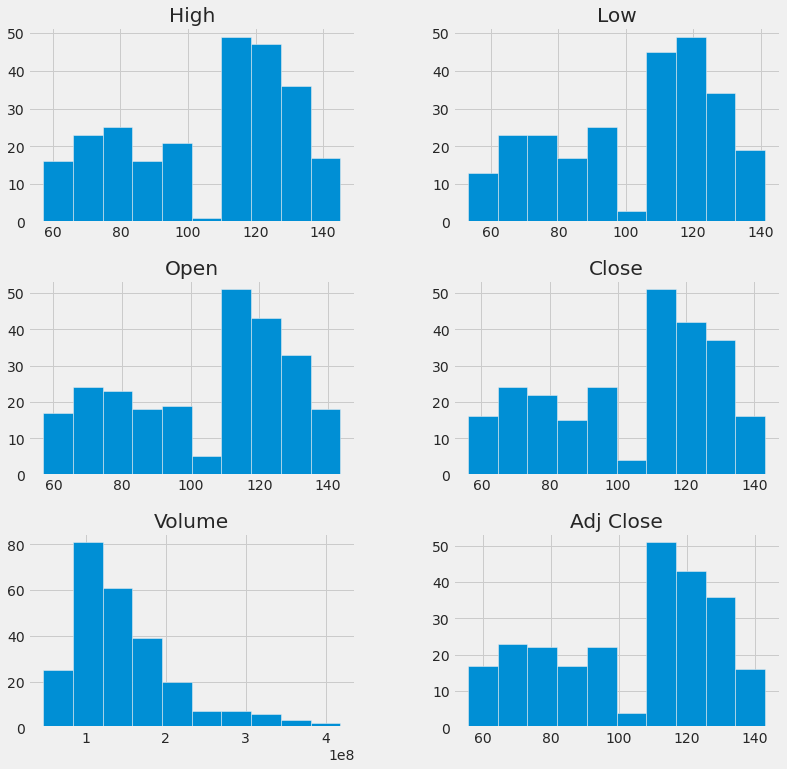

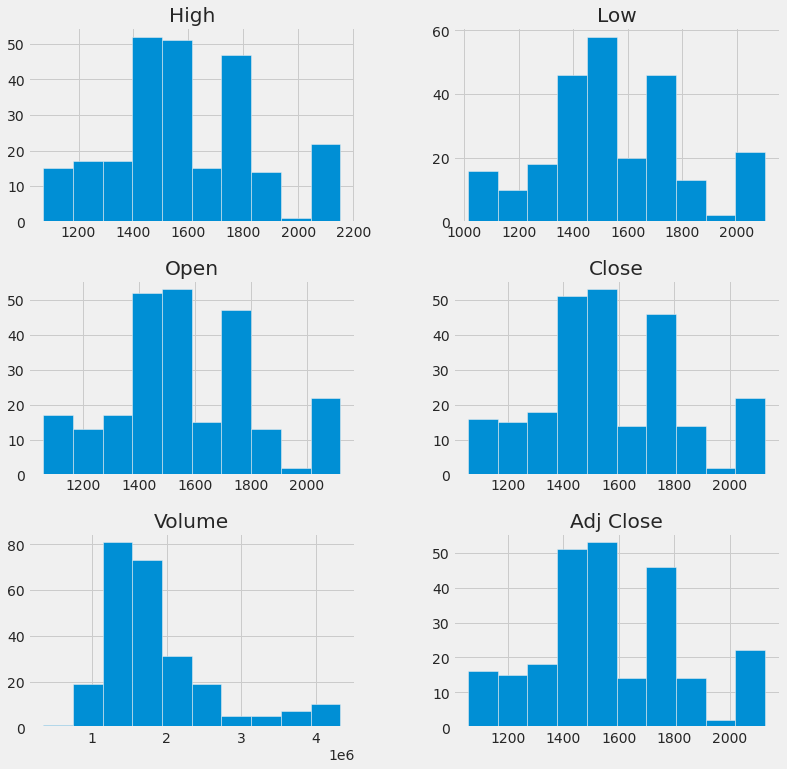

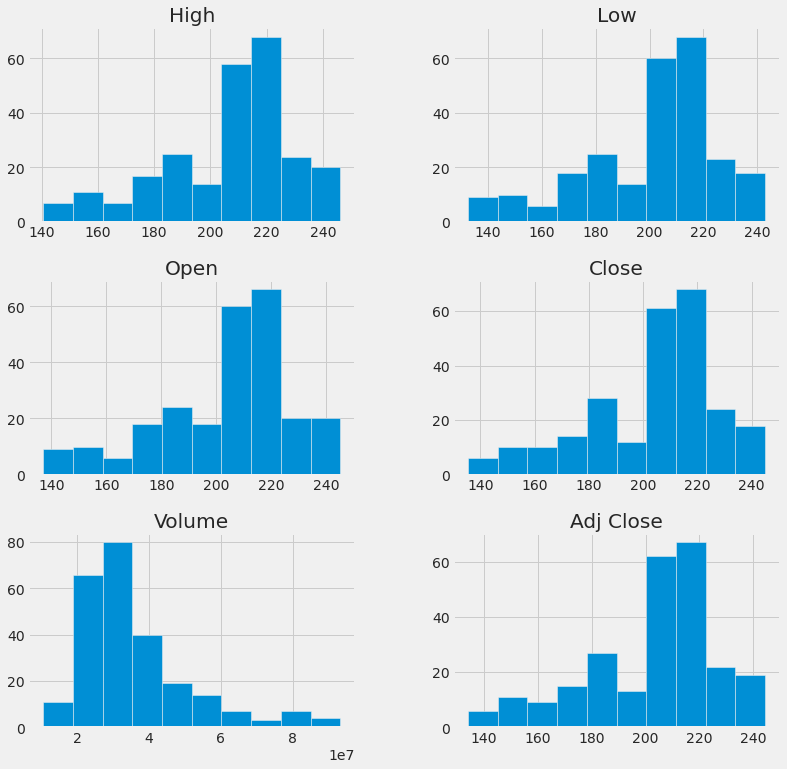

In [18]:
df.groupby("company_name").hist(figsize=(12, 12));

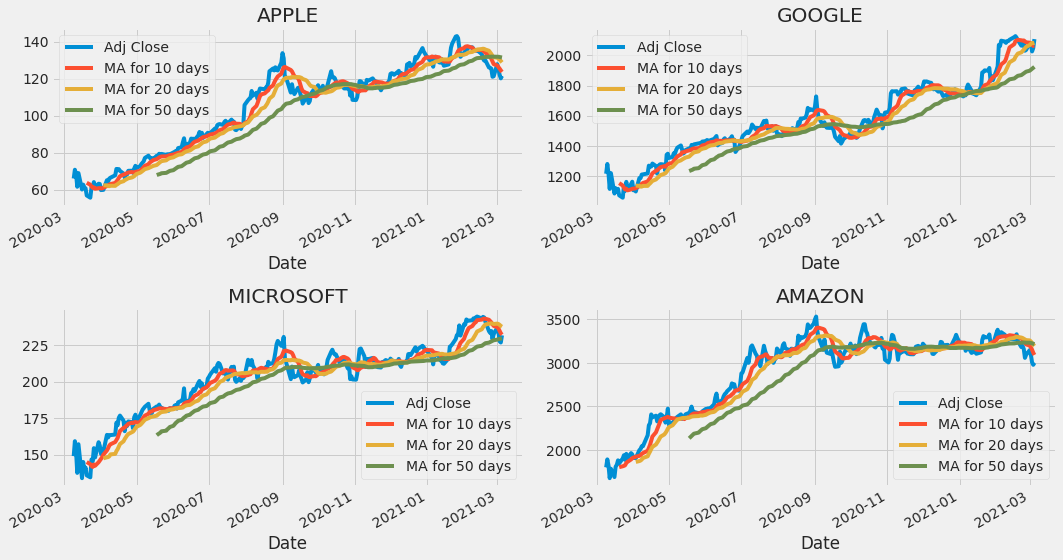

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## 2. Average daily return of the stock

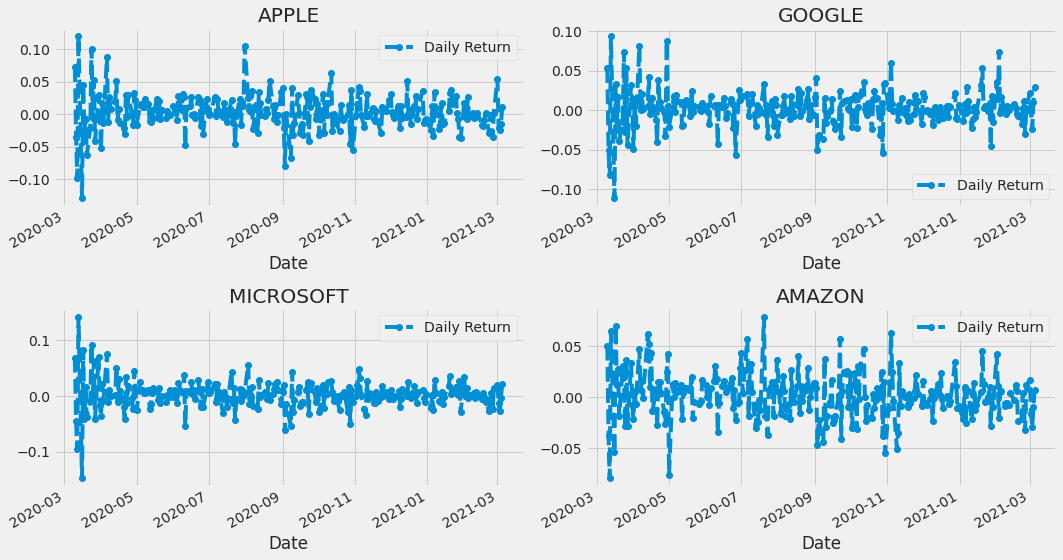

In [20]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

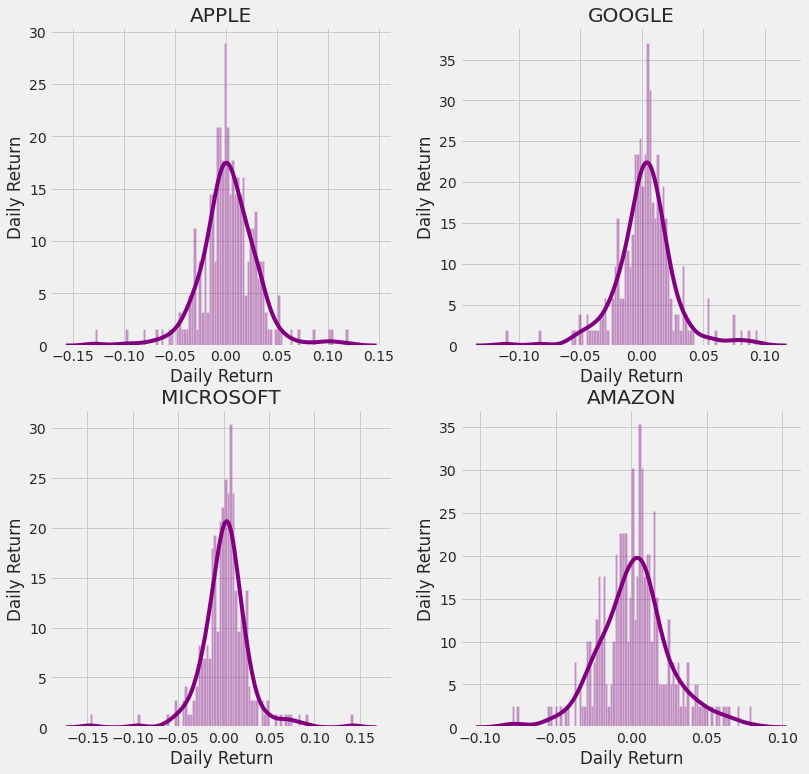

In [13]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()

## 3. Correlation coefficient

Investopedia:
- Correlation is used in modern portfolio theory to include diversified assets that can help reduce the overall risk of a portfolio.
- The correlation coefficient is basically a linear regression performed on each stock's returns against the other. 
- If mapped graphically, a positive correlation would show an upward-sloping line. A negative correlation would show a downward-sloping line.

In [21]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-03-09,66.030655,1215.560059,149.104797,1800.609985
2020-03-10,70.786301,1280.390015,159.301178,1891.819946
2020-03-11,68.327858,1215.410034,152.084518,1820.859985
2020-03-12,61.580158,1114.910034,137.661087,1676.609985
2020-03-13,68.957970,1219.729980,157.232208,1785.000000


In [22]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-03-09,NaN,NaN,NaN,NaN
2020-03-10,0.072022,0.053333,0.068384,0.050655
2020-03-11,-0.034730,-0.050750,-0.045302,-0.037509
2020-03-12,-0.098755,-0.082688,-0.094838,-0.079221
2020-03-13,0.119808,0.094017,0.142169,0.064648


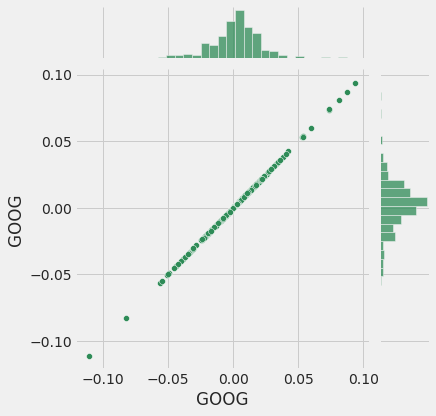

In [23]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

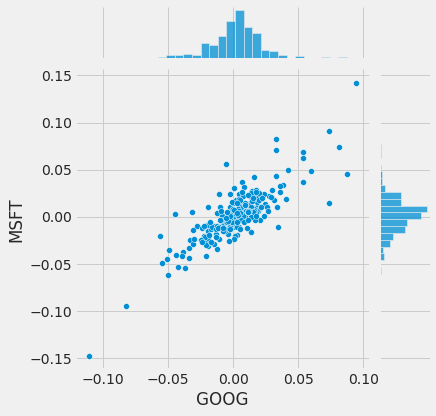

In [24]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

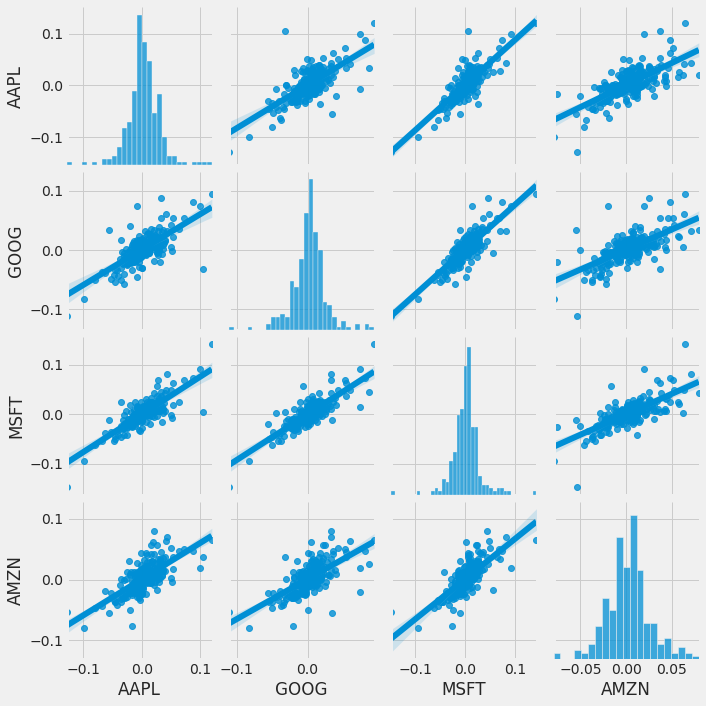

In [25]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

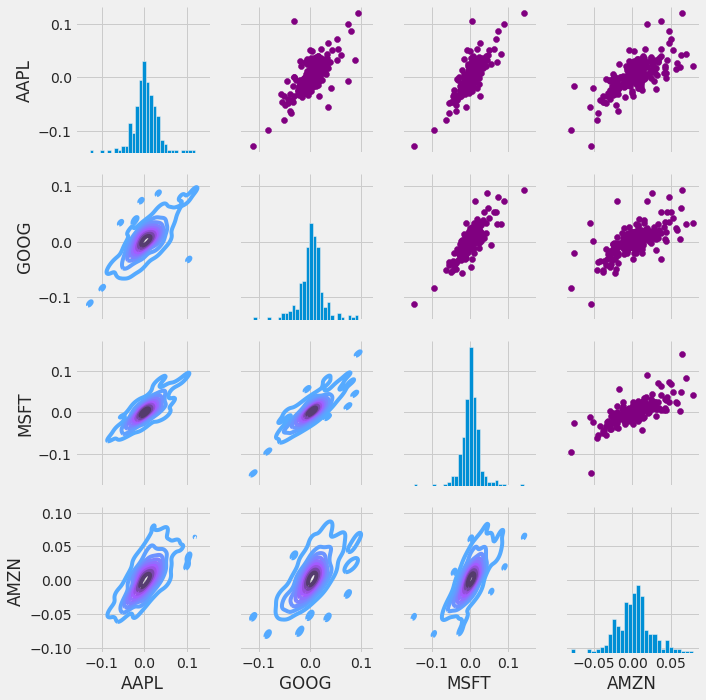

In [37]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

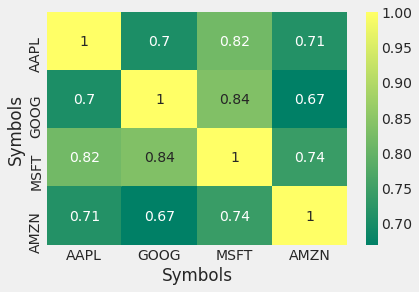

In [35]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

## 4. Stocks risk

A very basic method to quantify risk, is to compare the expected return with the std dev of the daily returns.

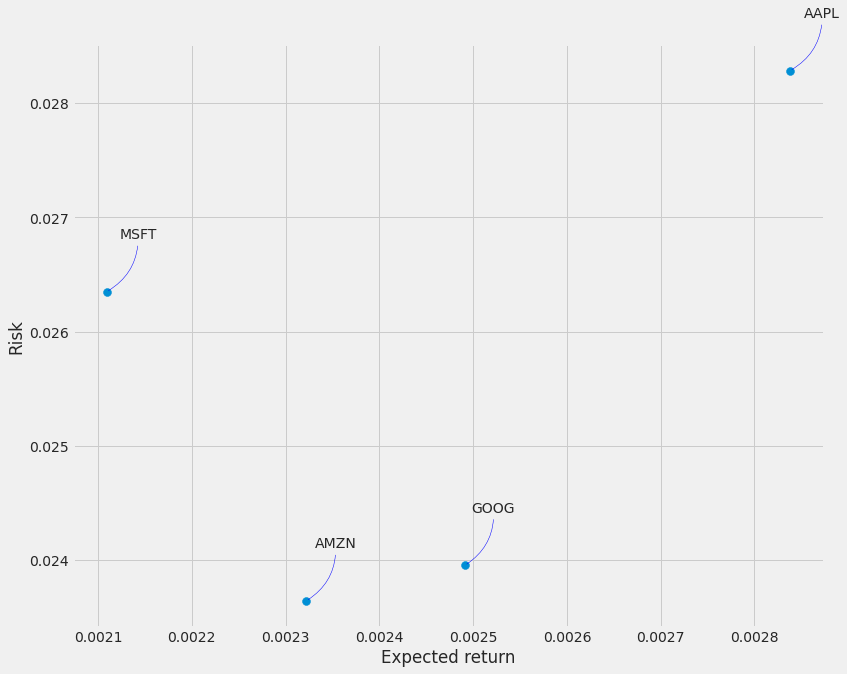

In [41]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))